# Introduction to Keras and TensorFlow

## What's TensorFlow?

Python-based, free, open source machine learning platform.

* developed primarily by Google
* computes automatically the gradient of any differentiable expression (highly suitable for DL)
* runs on CPU, GPU, TPU
* Computations can be distributed to many machines
* Supports other programming languages (C++, JavaScript, TF-lite, etc.)

## What's Keras?

Keras is a deep learning API for Python, built on top of Tensorflow.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/03-01.png" width="400"><p style='text-align: center;'> Figure 3.1 Keras and TensorFlow: TensorFlow is a low-level tensor computing platform, and Keras is a high-level deep learning API</p>

## Keras and TensorFlow: A brief history

* 2015: Keras predates Tensorflow by 8 months (Theano backend)
* late 2015: Keras supports both Theano and TF
* 2017: CNTK(Microsoft) and MXNet(Amazon) backend support
* Present: Only TF
* 2018: Keras becomes TF's official high-level API
* 2019: TensorFlow 2.0 (Keras integrated)

## Setting up a deep-learning workspace

Prefer using GPU instead of CPU when possible (5-10x faster)

GPU options:

* buy one ($1,500-$2,000)
* rent one (AWs, Google Cloud, Paperspace etc.) ($2.50per hour)
* use a free one (Google Colab or Paperspace Gradient etc.)

Use Unix (Linux)


### Jupyter notebooks: The preferred way to run deep-learning experiments

A way to edit code in your browser.

Can add markdown text for annotation/comments.

Can run blocks of code independently while maintaining the current state in memory (no need to rerun the whole script)


### Using Colaboratory

* free Jupyter notebook service
* no installation
* runs entirely in the cloud
* free (limited) GPU/TPU runtime

#### First steps with Colaboratory

https://colab.research.google.com


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/03-02.png" width="500"><p style='text-align: center;'> Figure 3.2 A Colab notebook</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/03-03.png" width="500"><p style='text-align: center;'> Figure 3.3 Creating a code cell</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/03-04.png" width="500"><p style='text-align: center;'>Figure 3.4 Creating a text cell</p>

#### Installing packages with pip

In [ ]:
!pip install package_name

#### Using the GPU runtime

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/03-05.png" width="400"><p style='text-align: center;'>Figure 3.5 Using the GPU runtime with Colab</p>

## First steps with TensorFlow

Low-level tensor manipulation

* Tensors/Variables
* Tensor operations (relu, matmul)
* Backpropagation (tf.GradientTape)

High-level (DL with Keras APIs)
* Layers
* Loss function
* Optimizer
* Metrics
* Training loop


#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [11]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [12]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [13]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.9628805 ]
 [ 0.63263375]
 [ 1.1655511 ]], shape=(3, 1), dtype=float32)


In [14]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.16649938]
 [0.18301511]
 [0.30832994]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [15]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [16]:
x = tf.ones(shape=(2, 2))
#x[0, 0] = 0.  ## Will Break !

**Creating a TensorFlow variable**

In [17]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.2996096],
       [0.8567552],
       [1.1711835]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [18]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [19]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [20]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [21]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [22]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

In [23]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [24]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
speed, acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [25]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
negative_samples.shape, positive_samples.shape

((1000, 2), (1000, 2))

**Stacking the two classes into an array with shape (2000, 2)**

In [26]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

**Generating the corresponding targets (0 and 1)**

In [27]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets.shape

(2000, 1)

**Plotting the two point classes**

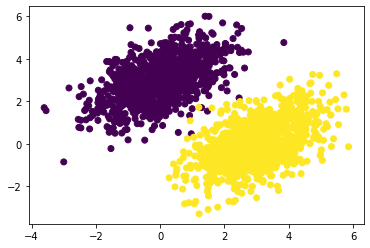

In [28]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

Linear classifier: an affine transformation (prediction = input * W + b)

trained to minimize the square of the difference between predictions and the targets

In [29]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
W.shape, b.shape

(TensorShape([2, 1]), TensorShape([1]))

**The forward pass function**

In [30]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [31]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [32]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [33]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.5946
Loss at step 1: 0.3652
Loss at step 2: 0.1525
Loss at step 3: 0.1151
Loss at step 4: 0.1034
Loss at step 5: 0.0958
Loss at step 6: 0.0894
Loss at step 7: 0.0837
Loss at step 8: 0.0784
Loss at step 9: 0.0737
Loss at step 10: 0.0693
Loss at step 11: 0.0654
Loss at step 12: 0.0618
Loss at step 13: 0.0585
Loss at step 14: 0.0555
Loss at step 15: 0.0528
Loss at step 16: 0.0504
Loss at step 17: 0.0481
Loss at step 18: 0.0461
Loss at step 19: 0.0442
Loss at step 20: 0.0425
Loss at step 21: 0.0410
Loss at step 22: 0.0396
Loss at step 23: 0.0383
Loss at step 24: 0.0371
Loss at step 25: 0.0361
Loss at step 26: 0.0351
Loss at step 27: 0.0342
Loss at step 28: 0.0334
Loss at step 29: 0.0327
Loss at step 30: 0.0320
Loss at step 31: 0.0314
Loss at step 32: 0.0309
Loss at step 33: 0.0304
Loss at step 34: 0.0299
Loss at step 35: 0.0295
Loss at step 36: 0.0291
Loss at step 37: 0.0288
Loss at step 38: 0.0285
Loss at step 39: 0.0282


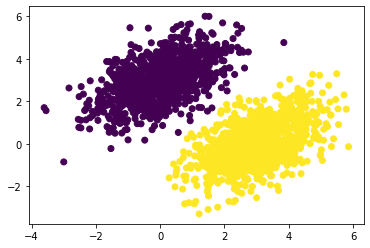

In [34]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

\begin{eqnarray}
\text{Prediction} & == & W \cdot \text{point} + b \\
           & == & [ [w_1], [w_2]] \cdot [ x, y] + b\\
           & == & w_1 * x + w_2 * y + b
\end{eqnarray}

Class 0 : $ w_1 * x + w_2 * y + b < 0.5 $

Class 1 : $ w_1 * x + w_2 * y + b > 0.5 $

line function : 

$$ w_1 * x + w_2 * y + b = 0.5 $$
$$ y = - w_1/w_2  * x + (0.5 - b) / w_2 $$

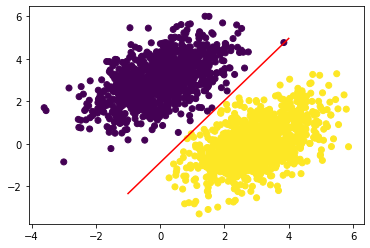

In [35]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

'Layer' 하위 클래스로 구현된 'Dense' layer

Keras의 모든 것은  Layer 이거나  Layer 와 밀접하게 상호 작용하는 것입니다.

Layer 는 state(가중치) 와 computation(정방향 전달)이 있는 객체(Object)입니다


In [36]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [37]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [38]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

Layer는 1차원이 32로 변환된 텐서를 출력합니다.

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

 Keras는 입력 모양(input shape)에 대한 정보가 필요하지 않습니다. 이를 동적으로 추론합니다.

In [40]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

Schematic of __call__() method for SimpleDense layer
```python
def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)
```
(```__call__()``` actually does many more things)

### From layers to models

NN : a graph of layers

in Keras : Model class

Sequential : Stack of layers

for more complicated architectures:

* Functional API
* Subclass the Model calss

The topology of a model defines the hypothetis space (space of possibilities)

It encodes the assumptions/prior knowledge

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/03-09.png" width="400"><p style='text-align: center;'>Figure 3.9 The Transformer architecture (covered in chapter 11). There’s a lot going on here. Throughout the next few chapters, you’ll climb your way up to understanding it.</p>

### The "compile" step: Configuring the learning process

* __Loss function__ (objective function) : 훈련 중에 최소화할 양입니다. 당면한 작업의 성공 척도를 나타냅니다.

* __Optimizer__ : 손실 함수를 기반으로 네트워크 업데이트 방법을 결정합니다.
* __Metrics__ : 분류 정확도와 같이 훈련 및 검증 중에 모니터링하려는 성공 측정값입니다. 손실과 달리 훈련은 이러한 메트릭에 대해 직접 최적화되지 않습니다. 따라서 메트릭은 미분가능일 필요가 없습니다.



In [41]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [42]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

Useful for passing custom loss or metrics

```python
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=my_custom.loss,
              metrics=[my_custom_metric_1, my_custom_metric_2])
```

Many available built-in options

Optimizers:

* SGD(with or without momentum)
* RMSprop
* Adam
* Adagrad
* Etc.

Losses:

* CategoricalCrossentropy
* SparseCategoricalCrossentropy
* BinaryCrossentropy
* MeanSquaredError
* KLDivergence
* CosineSimilarity
* Etc.

Metrics:

* CategoricalAccuracy
* SparseCategoricalAccuracy
* BinaryAccuracy
* ACU
* Precision
* Recall
* Etc.

 
 


### Picking a loss function

올바른 손실 함수(loss function)를 선택하는 것이 매우 중요합니다.

예: 살아있는 모든 인간의 평균 웰빙 극대화

몇 가지 지침이 있습니다.:

* two-class classification -> binary crossentropy
* many-class classification -> categorical crossentropy

### Understanding the fit() method

fit( ) arguments

* 학습할 데이터(입력 및 타겟)(일반적으로 Numpy 배열 또는 TensorFlow Dataset 객체)
* 훈련할 Epoch 수
* mini-batch 경사하강법의 각 에포크 내에서 사용할 배치 크기(batch size)

**Calling `fit()` with NumPy data**

In [43]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 4ms/step - loss: 5.0986 - binary_accuracy: 0.8090
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 4.8284 - binary_accuracy: 0.8190
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 4.6043 - binary_accuracy: 0.8300
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 4.3932 - binary_accuracy: 0.8455
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 4.1955 - binary_accuracy: 0.8580


In [44]:
history.history

{'loss': [5.098578929901123,
  4.82836389541626,
  4.604288101196289,
  4.393160820007324,
  4.195469379425049],
 'binary_accuracy': [0.8090000152587891,
  0.8190000057220459,
  0.8299999833106995,
  0.8454999923706055,
  0.8579999804496765]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [45]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 5ms/step - loss: 0.2761 - binary_accuracy: 0.9664 - val_loss: 0.2004 - val_binary_accuracy: 0.7800
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0755 - binary_accuracy: 0.9571 - val_loss: 0.0911 - val_binary_accuracy: 0.9717
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0654 - binary_accuracy: 0.9614 - val_loss: 0.1172 - val_binary_accuracy: 0.8700
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0760 - binary_accuracy: 0.9493 - val_loss: 0.0764 - val_binary_accuracy: 0.9683
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0700 - binary_accuracy: 0.9571 - val_loss: 0.1990 - val_binary_accuracy: 0.6400


In [46]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 2ms/step - loss: 0.1990 - binary_accuracy: 0.6400


### Inference: Using a model after training

In [51]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.9707581 ]
 [0.7871135 ]
 [0.50565857]
 [0.59485596]
 [0.65482074]
 [0.5048202 ]
 [1.0888333 ]
 [1.0034444 ]
 [0.4500277 ]
 [0.92664623]]


## Summary

* TensorFlow
 - numerical computing framework
 - runs on CPU, GPU, TPU
* Keras: standard API for DL with TF
* Key TF objects
 - tensors
 - variables
 - tensor operations
 - gradient tape
* Key Keras objects
 - Layer
 - Model
* Keras steps
 - model.compile()
 - model.fit()
 - model.evaluate()
 - model.predict()